###  **Loading and Analysing SPY Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data/Spy.csv')

In [ ]:
data.head()

,money_start,money_goal,period,Spy
0,8000,17000,1,11.48
1,6000,10000,1,11.48
2,7000,9000,1,11.48
3,2000,5000,1,11.48
4,9000,11000,1,11.48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   money_start  500 non-null    int64  
 1   money_goal   500 non-null    int64  
 2   period       500 non-null    int64  
 3   Spy          500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [ ]:
data['period'] = data['period'].astype(int) ## Converting data type of period to int

### **Feature Engineering**

Including the revelant columns calculated from the existing ones

In [ ]:
import numpy as np

lst1 = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = data['money_start'][j]*((1+data['Spy'][j]/100)**period)
    lst1 = np.append(lst1,a)

In [ ]:
data['term1'] = lst1

In [ ]:
import numpy as np

lst = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = sum((1+ data['Spy'][j]/100)**(period-i) for i in range(1,period))
    lst = np.append(lst,a)



In [ ]:
data['term2'] = lst

In [ ]:
data.head()

,money_start,money_goal,period,Spy,term1,term2
0,8000,17000,1,11.48,9942.23232,1.1148
1,6000,10000,1,11.48,7456.67424,1.1148
2,7000,9000,1,11.48,8699.45328,1.1148
3,2000,5000,1,11.48,2485.55808,1.1148
4,9000,11000,1,11.48,11185.01136,1.1148


In [ ]:
lst2 = []

for j in range(0,len(data)):
    increment = (data['money_goal'][j] - data['term1'][j])/data['term2'][j]

    lst2 = np.append(lst2, increment)


In [ ]:
data['increment'] = lst2

In [ ]:
data.head()

,money_start,money_goal,period,Spy,term1,term2,increment
0,8000,17000,1,11.48,9942.23232,1.1148,6330.972085
1,6000,10000,1,11.48,7456.67424,1.1148,2281.418873
2,7000,9000,1,11.48,8699.45328,1.1148,269.596986
3,2000,5000,1,11.48,2485.55808,1.1148,2255.509437
4,9000,11000,1,11.48,11185.01136,1.1148,-165.959239


### **Train-Test-Split**  

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = data.sample(frac=1)

In [ ]:
### Features and Target column

features = data.drop('increment', axis=1)
target = data['increment']

In [ ]:
### Train Test Split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, target, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 6) (75, 6) (75, 6) (350,) (75,) (75,)


In [ ]:
### Standardization

##scaler = StandardScaler()

##train_scaled = pd.DataFrame(
      ##scaler.fit_transform(X_train),
      ##columns=X_train.columns)

##test_scaled = pd.DataFrame(
      ##scaler.transform(X_test),
      ##columns=X_test.columns)

##train_val_scaled = pd.DataFrame(
      ##scaler.fit_transform(X_val),
      ##columns=X_val.columns)

### **Model Building**

In [ ]:
### Neural Networks

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,), kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear',kernel_initializer='normal'),
])

In [ ]:
#from tensorflow.keras.losses import MeanSquaredLogarithmicError

#msle = MeanSquaredLogarithmicError()

model.compile(optimizer='adam',
              loss= 'mae',
             metrics = ['mae'])

In [ ]:
hist = model.fit(X_train.values, Y_train.values,
          batch_size=32, epochs=500,
          validation_data=(X_val.values, Y_val.values))

Epoch 1/500
11/11 [==============================] - 2s 41ms/step - loss: 1959.6249 - mae: 1959.6249 - val_loss: 1398.3527 - val_mae: 1398.3527
Epoch 2/500
11/11 [==============================] - 0s 9ms/step - loss: 1880.2422 - mae: 1880.2422 - val_loss: 1319.1461 - val_mae: 1319.1461
Epoch 3/500
11/11 [==============================] - 0s 9ms/step - loss: 1798.6948 - mae: 1798.6948 - val_loss: 1312.7596 - val_mae: 1312.7596
Epoch 4/500
11/11 [==============================] - 0s 9ms/step - loss: 1677.0239 - mae: 1677.0239 - val_loss: 1139.2307 - val_mae: 1139.2307
Epoch 5/500
11/11 [==============================] - 0s 9ms/step - loss: 1565.9204 - mae: 1565.9204 - val_loss: 1122.2802 - val_mae: 1122.2802
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 1362.9635 - mae: 1362.9635 - val_loss: 851.0114 - val_mae: 851.0114
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 1154.2932 - mae: 1154.2932 - val_loss: 689.3290 - val_mae: 689.3290
Ep

**Plotting the Model Loss**  

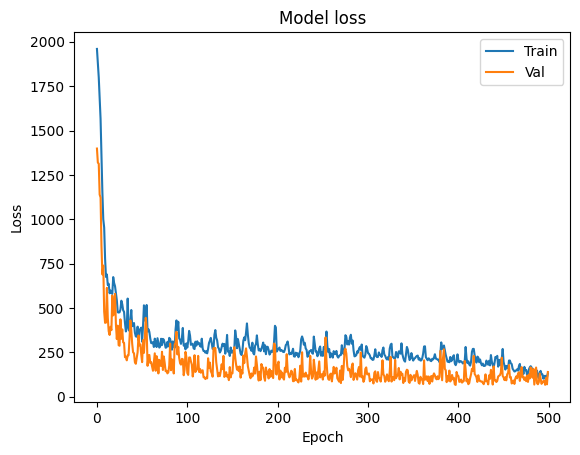

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### **Decision tree and Random Forest Regressor**  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [ ]:
tree_model.fit(X_train.values, Y_train.values)
rf_model.fit(X_train.values, Y_train.values)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

score_tree = mean_absolute_error(Y_test, tree_model.predict(X_test))  ##Calculating the mean absolute error Decision tree model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_rf = mean_absolute_error(Y_test, rf_model.predict(X_test)) ##Calculating the mean absolute error Random Forest model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_nn = mean_absolute_error(Y_test, model.predict(X_test)) ##Calculating the mean absolute error Neural Network model

3/3 [==============================] - 0s 3ms/step


Printing the mean absolute error scores for the above trained models

In [ ]:
print(score_tree)
print(score_rf)
print(score_nn)

257.37271361556725
192.8432944371955
173.9033056745126


We can say that Neural Networ performed well in this case

**Save the model file**  

In [ ]:
model.save('model_spy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
